In [3]:
#general:
import tweepy           
import pandas as pd     
import numpy as np  

#for plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import pre-processed data (read csv files)
dfBitcoin = pd.read_csv('Hasitha_Pre_Processed_Data/bitcoin_preprocessed_data.csv', nrows=60000)
dfEthereum = pd.read_csv('Hasitha_Pre_Processed_Data/ethereum_preprocessed_data.csv', nrows=60000)
print("Data imported successful!")

#data analysis

#time series for bitoin and ethereum
tlenBTC = pd.Series(data=dfBitcoin['tweet_length'].values, index=[dfBitcoin['tweet_created_time']])
tfavBTC = pd.Series(data=dfBitcoin['tweet_likes'].values, index=dfBitcoin['tweet_created_time'])
tretBTC = pd.Series(data=dfBitcoin['tweet_retweets'].values, index=dfBitcoin['tweet_created_time'])

tlenETC = pd.Series(data=dfEthereum['tweet_length'].values, index=[dfEthereum['tweet_created_time']])
tfavETC = pd.Series(data=dfEthereum['tweet_likes'].values, index=dfEthereum['tweet_created_time'])
tretETC = pd.Series(data=dfEthereum['tweet_retweets'].values, index=dfEthereum['tweet_created_time'])


#Total length analysis
totalLengthBTC = dfBitcoin['tweet_length'].sum()
totalLengthETC = dfEthereum['tweet_length'].sum()
totalSumLength = totalLengthBTC + totalLengthETC

avg = dfBitcoin['tweet_length'].count()
v1 = totalLengthBTC/avg
v2 = totalLengthETC/avg

print('\nBitcoin average tweet length: {0:.2f}'.format(v1))
print('Ethereum average tweet length: {0:.2f}'.format(v2))


#Total likes analysis
totalLikesBTC = dfBitcoin['tweet_likes'].sum()
totalLikesETC = dfEthereum['tweet_likes'].sum()
totalSumLikes = totalLikesBTC + totalLikesETC

BTCLikesPercentage = (totalLikesBTC * 100)/totalSumLikes
ETCLikesPercentage = (totalLikesETC * 100)/totalSumLikes

print("\nPercentage of BTC Likes: {0:.2f}%".format(BTCLikesPercentage))
print("Percentage of ETC Likes: {0:.2f}%".format(ETCLikesPercentage))


#Total retweets analysis
totalRetweetsBTC = dfBitcoin['tweet_retweets'].sum()
totalRetweetsETC = dfEthereum['tweet_retweets'].sum()
totalSum = totalRetweetsBTC + totalRetweetsETC

BTCRetweetsPercentage = (totalRetweetsBTC * 100)/totalSum
ETCRetweetsPercentage = (totalRetweetsETC * 100)/totalSum

print("\nPercentage of BTC retweets: {0:.2f}%".format(BTCRetweetsPercentage))
print("Percentage of ETC retweets: {0:.2f}%".format(ETCRetweetsPercentage))


#twitter source analysis
source1 = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['twitter_source'][index]=='Twitter Web Client']
source2 = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['twitter_source'][index]=='Twitter for Android']
source3 = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['twitter_source'][index]=='Twitter for iPhone']
source4 = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['twitter_source'][index]=='Twitter Lite']
source5 = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['twitter_source'][index]=='IFTTT']

source1_percentage = len(source1)*100/len(dfEthereum['tweet_text'])
source2_percentage = len(source2)*100/len(dfEthereum['tweet_text'])
source3_percentage = len(source3)*100/len(dfEthereum['tweet_text'])
source4_percentage = len(source4)*100/len(dfEthereum['tweet_text'])
source5_percentage = len(source5)*100/len(dfEthereum['tweet_text'])
total = (source1_percentage+source2_percentage+source3_percentage+source4_percentage+source5_percentage)
other = (100-total)

print("\nTwitter sources percentage")
print("Twitter Web Client: {0:.2f}%".format(source1_percentage))
print("Twitter for iPhone: {0:.2f}%".format(source3_percentage))
print("Twitter Lite: {0:.2f}%".format(source4_percentage))
print("IFTTT: {0:.2f}%".format(source5_percentage))
print("Other: {0:.2f}%".format(other))


#construct lists with classified tweets:
pos_tweets_BTC = [ tweet for index, tweet in enumerate(dfBitcoin['tweet_text']) if dfBitcoin['sentiment_analysis'][index] > 0]
neu_tweets_BTC = [ tweet for index, tweet in enumerate(dfBitcoin['tweet_text']) if dfBitcoin['sentiment_analysis'][index] == 0]
neg_tweets_BTC = [ tweet for index, tweet in enumerate(dfBitcoin['tweet_text']) if dfBitcoin['sentiment_analysis'][index] < 0]

pos_tweets_ETC = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['sentiment_analysis'][index] > 0]
neu_tweets_ETC = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['sentiment_analysis'][index] == 0]
neg_tweets_ETC = [ tweet for index, tweet in enumerate(dfEthereum['tweet_text']) if dfEthereum['sentiment_analysis'][index] < 0]


#Bitcoin vs Ethereum analysis
positive_tweet_percentage_BTC = len(pos_tweets_BTC)*100/len(dfBitcoin['tweet_text'])
neutral_tweet_percentage_BTC = len(neu_tweets_BTC)*100/len(dfBitcoin['tweet_text'])
negative_tweet_percentage_BTC = len(neg_tweets_BTC)*100/len(dfBitcoin['tweet_text'])

positive_tweet_percentage_ETC = len(pos_tweets_ETC)*100/len(dfEthereum['tweet_text'])
neutral_tweet_percentage_ETC = len(neu_tweets_ETC)*100/len(dfEthereum['tweet_text'])
negative_tweet_percentage_ETC = len(neg_tweets_ETC)*100/len(dfEthereum['tweet_text'])

print("\nBitcoin percentage")
print("Percentage of positive tweets: {0:.2f}%".format(positive_tweet_percentage_BTC))
print("Percentage of neutral tweets: {0:.2f}%".format(neutral_tweet_percentage_BTC))
print("Percentage of negative tweets: {0:.2f}%".format(negative_tweet_percentage_BTC))

print("\nEthereum percentage")
print("Percentage of positive tweets: {0:.2f}%".format(positive_tweet_percentage_ETC))
print("Percentage of neutral tweets: {0:.2f}%".format(neutral_tweet_percentage_ETC))
print("Percentage of negative tweets: {0:.2f}%".format(negative_tweet_percentage_ETC))

print("\ndata analysis completed!")

print('\nGenerating graphs...')

Data imported successful!

Bitcoin average tweet length: 130.68
Ethereum average tweet length: 135.55

Percentage of BTC Likes: 46.26%
Percentage of ETC Likes: 53.74%

Percentage of BTC retweets: 33.86%
Percentage of ETC retweets: 66.14%

Twitter sources percentage
Twitter Web Client: 42.51%
Twitter for iPhone: 8.18%
Twitter Lite: 6.40%
IFTTT: 3.96%
Other: 20.41%

Bitcoin percentage
Percentage of positive tweets: 35.12%
Percentage of neutral tweets: 49.14%
Percentage of negative tweets: 15.74%

Ethereum percentage
Percentage of positive tweets: 43.90%
Percentage of neutral tweets: 45.73%
Percentage of negative tweets: 10.37%

data analysis completed!

Generating graphs...


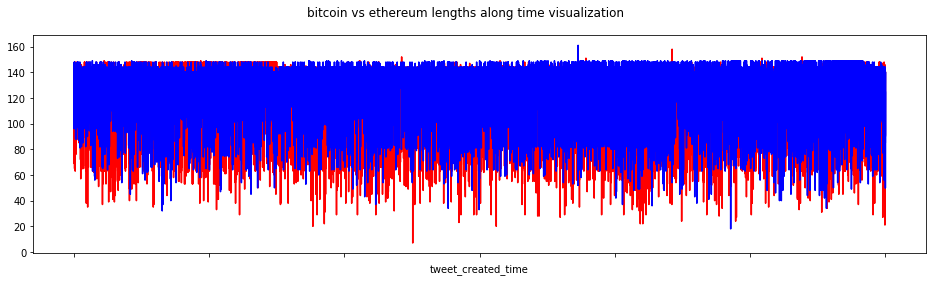

<Figure size 432x288 with 0 Axes>

In [7]:
#Figure: bitcoin vs ethereum lengths along time visualization
fig = plt.figure()
tlenBTC.plot(figsize=(16,4), color='red', title="bitcoin vs ethereum lengths along time visualization", subplots=True)
tlenETC.plot(figsize=(16,4), color='blue');
plt.figure().savefig('figure1.png')
fig.savefig('Hasitha_Graphs/figure1.png', bbox_inches='tight')


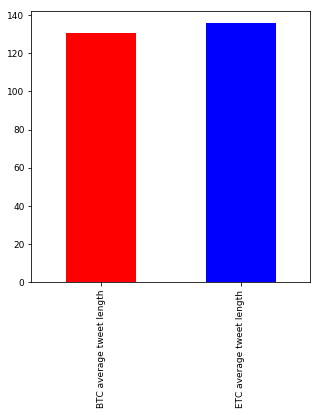

In [8]:
#Figure: Bitcoin vs Ethereum average tweet length
fig = plt.figure()
bar_chart_average_length = pd.Series([v1,v2], 
                      index=['BTC average tweet length','ETC average tweet length'], 
                      name='Bitcoin vs Ethereum average tweet length')
bar_chart_average_length.plot.bar(fontsize=9,figsize=(5, 5),color = ['red', 'blue']);
fig.savefig('Hasitha_Graphs/figure2.png', bbox_inches='tight')



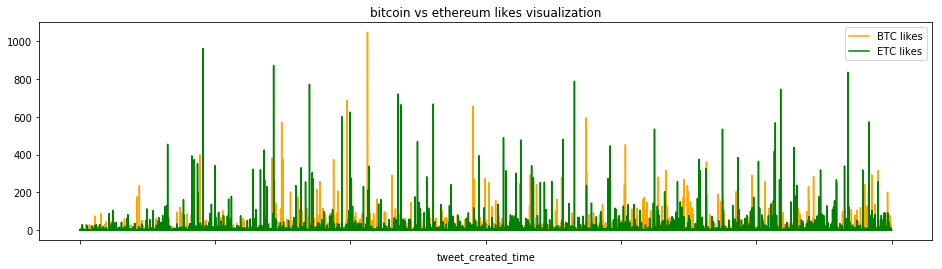

<Figure size 432x288 with 0 Axes>

In [9]:
#Figure: bitcoin vs ethereum likes visualization
fig = plt.figure()
tfavBTC.plot(figsize=(16,4), label="BTC likes", color='orange', legend=True, 
             title="bitcoin vs ethereum likes visualization")
tfavETC.plot(figsize=(16,4), label="ETC likes", color='green', legend=True);
plt.figure()
fig.savefig('Hasitha_Graphs/figure3.png', bbox_inches='tight')

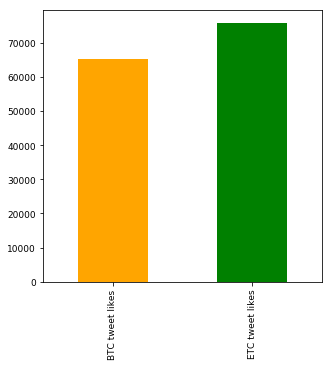

<Figure size 432x288 with 0 Axes>

In [10]:
#Figure: Bitcoin vs Ethereum total tweet likes bar
fig = plt.figure()
bar_chart_total_likes = pd.Series([totalLikesBTC,totalLikesETC], 
                      index=['BTC tweet likes','ETC tweet likes'], 
                      name='Bitcoin vs Ethereum total tweet likes')
bar_chart_total_likes.plot.bar(fontsize=9,figsize=(5, 5),color = ['orange', 'green']);
plt.figure()
fig.savefig('Hasitha_Graphs/figure4.png', bbox_inches='tight')


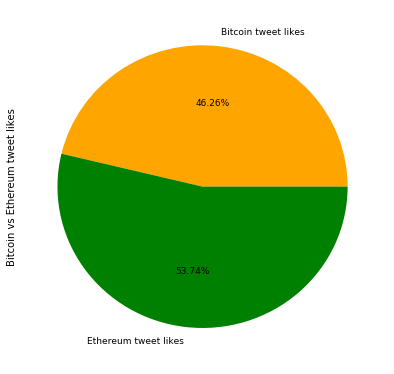

<Figure size 432x288 with 0 Axes>

In [11]:
#Figure: Bitcoin vs Ethereum tweet likes pie
fig = plt.figure()
pie_chart_BTC_Likes = pd.Series([BTCLikesPercentage,ETCLikesPercentage], 
                      index=['Bitcoin tweet likes','Ethereum tweet likes'], 
                      name='Bitcoin vs Ethereum tweet likes')
pie_chart_BTC_Likes.plot.pie(fontsize=9, autopct='%.2f%%', figsize=(6.5, 6.5),colors = ['orange', 'green']);
plt.figure()
fig.savefig('Hasitha_Graphs/figure5.png', bbox_inches='tight')

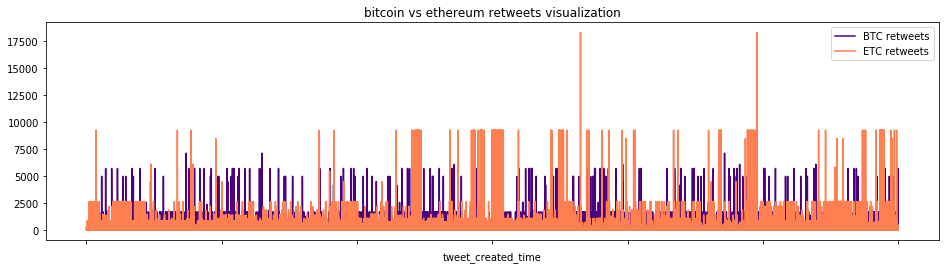

<Figure size 432x288 with 0 Axes>

In [12]:
#Figure: bitcoin vs ethereum retweets visualization
fig = plt.figure()
tretBTC.plot(figsize=(16,4), label="BTC retweets", color='indigo', legend=True, 
             title="bitcoin vs ethereum retweets visualization")
tretETC.plot(figsize=(16,4), label="ETC retweets", color='coral', legend=True);
plt.figure()
fig.savefig('Hasitha_Graphs/figure6.png', bbox_inches='tight')


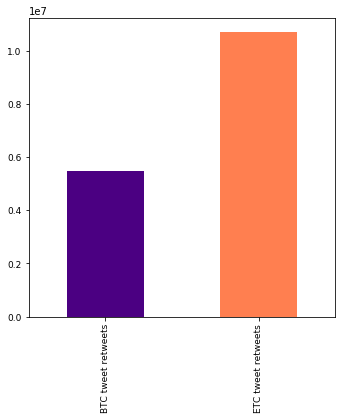

<Figure size 432x288 with 0 Axes>

In [13]:
#FigureL Bitcoin vs Ethereum total tweet retweets bar
fig = plt.figure()
bar_chart_total_retweets = pd.Series([totalRetweetsBTC,totalRetweetsETC], 
                      index=['BTC tweet retweets','ETC tweet retweets'], 
                      name='Bitcoin vs Ethereum total tweet retweets')
bar_chart_total_retweets.plot.bar(fontsize=9,figsize=(5.5,5.5), color = ['indigo', 'coral']);
plt.figure()
fig.savefig('Hasitha_Graphs/figure7.png', bbox_inches='tight')

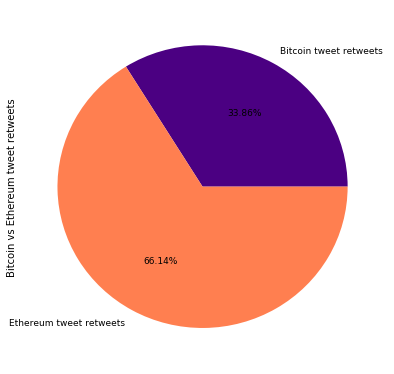

<Figure size 432x288 with 0 Axes>

In [14]:
#Figure: Bitcoin vs Ethereum tweet retweets pie
fig = plt.figure()
pie_chart_BTC_retweets = pd.Series([BTCRetweetsPercentage,ETCRetweetsPercentage], 
                      index=['Bitcoin tweet retweets','Ethereum tweet retweets'], 
                      name='Bitcoin vs Ethereum tweet retweets')
pie_chart_BTC_retweets.plot.pie(fontsize=9, autopct='%.2f%%', figsize=(6.5, 6.5),colors = ['indigo', 'coral']);
plt.figure()
fig.savefig('Hasitha_Graphs/figure8.png', bbox_inches='tight')

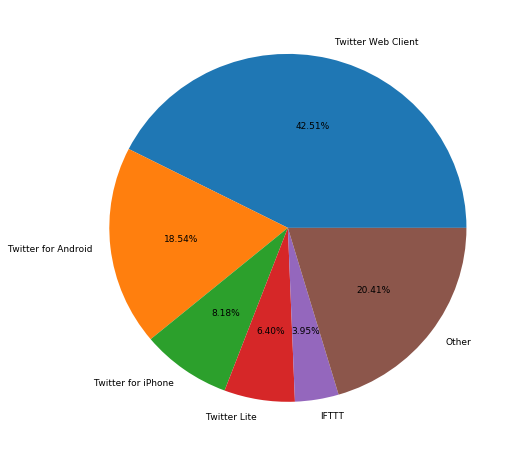

<Figure size 432x288 with 0 Axes>

In [15]:
#Figure: Twitter source pie
fig = plt.figure()
pie_chart_Sources = pd.Series([source1_percentage,source2_percentage,source3_percentage,source4_percentage,
                              source5_percentage, other], 
                      index=['Twitter Web Client','Twitter for Android','Twitter for iPhone','Twitter Lite',
                             'IFTTT','Other'], 
                      name='')
pie_chart_Sources.plot.pie(fontsize=9, autopct='%.2f%%', figsize=(8,8));
plt.figure()
fig.savefig('Hasitha_Graphs/figure9.png', bbox_inches='tight')

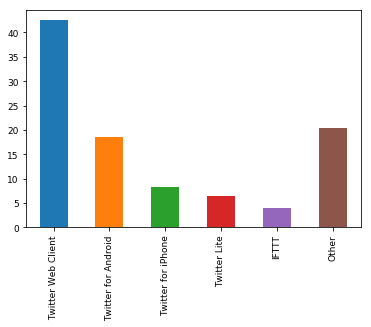

<Figure size 432x288 with 0 Axes>

In [16]:
#Figure: Twitter source bar
fig = plt.figure()
bar_chart_sources = pd.Series([source1_percentage,source2_percentage,source3_percentage,source4_percentage,
                             source5_percentage,other], 
                      index=['Twitter Web Client','Twitter for Android','Twitter for iPhone','Twitter Lite',
                             'IFTTT','Other'], 
                      name='Twitter Sources')

bar_chart_sources.plot.bar(fontsize=9);
plt.figure()
fig.savefig('Hasitha_Graphs/figure10.png', bbox_inches='tight')

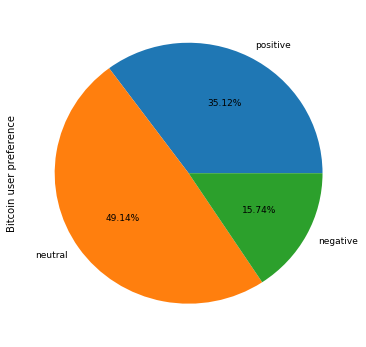

<Figure size 432x288 with 0 Axes>

In [17]:
#Figure: Bitcoin user preference
fig = plt.figure()
pie_chart_BTC = pd.Series([positive_tweet_percentage_BTC,neutral_tweet_percentage_BTC,negative_tweet_percentage_BTC], 
                      index=['positive','neutral','negative'], 
                      name='Bitcoin user preference')
pie_chart_BTC.plot.pie(fontsize=9, autopct='%.2f%%', figsize=(6, 6));
plt.figure()
fig.savefig('Hasitha_Graphs/figure11.png', bbox_inches='tight')


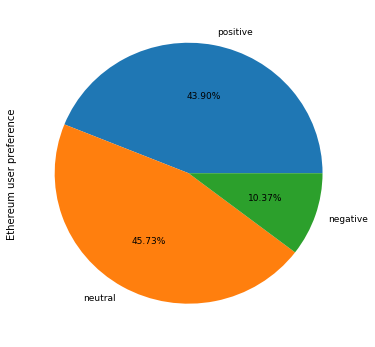

<Figure size 432x288 with 0 Axes>

In [18]:
#Figure: Ethereum user preference
fig = plt.figure()
pie_chart_ETC = pd.Series([positive_tweet_percentage_ETC,neutral_tweet_percentage_ETC,negative_tweet_percentage_ETC], 
                      index=['positive','neutral','negative'], 
                      name='Ethereum user preference')
pie_chart_ETC.plot.pie(fontsize=9, autopct='%.2f%%', figsize=(6, 6));
plt.figure()
fig.savefig('Hasitha_Graphs/figure12.png', bbox_inches='tight')

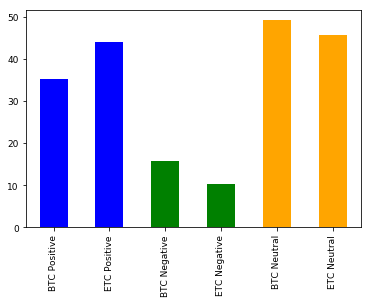

<Figure size 432x288 with 0 Axes>

In [19]:
#Figure: Bitcoin vs Ethereum user preference
fig = plt.figure()
bar_chart_final = pd.Series([positive_tweet_percentage_BTC,
                             positive_tweet_percentage_ETC,
                            negative_tweet_percentage_BTC,
                            negative_tweet_percentage_ETC,
                            neutral_tweet_percentage_BTC,
                            neutral_tweet_percentage_ETC], 
                      index=['BTC Positive','ETC Positive','BTC Negative','ETC Negative',
                            'BTC Neutral','ETC Neutral'], 
                      name='Bitcoin vs Ethereum user preference')

bar_chart_final.plot.bar(fontsize=9,color = ['blue','blue', 'green','green','orange','orange']);
plt.figure()
fig.savefig('Hasitha_Graphs/figure13.png', bbox_inches='tight')